In [37]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [38]:
df = pd.read_csv('Live.csv')

In [39]:
df.shape

(7050, 16)

In [40]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [42]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [43]:
# Drop redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [44]:
df2=df.copy()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [46]:
# statistical summary of numerical variables
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [47]:
len(df['status_id'].unique())

6997

In [48]:
len(df['status_published'].unique())

6913

## EDA

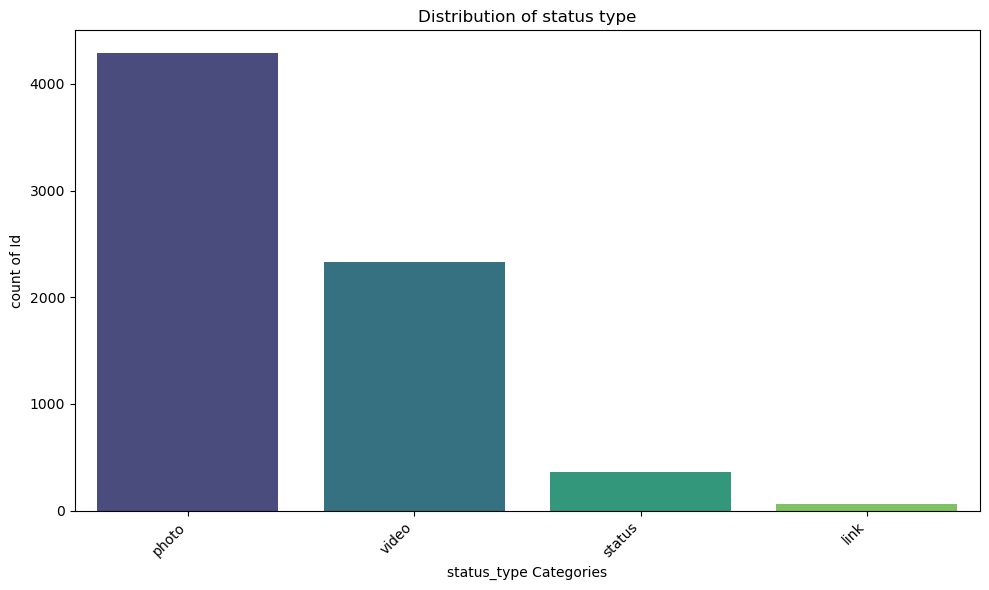

In [49]:

status_type = df['status_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_type.index, y=status_type.values, palette='viridis')
plt.xlabel('status_type Categories')
plt.ylabel('count of Id')
plt.title('Distribution of status type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [50]:
df['status_published'] = pd.to_datetime(df['status_published'])

In [51]:
# Split RECORD_DATE into month, day, and year columns
df['Month'] = df['status_published'].dt.month
df['Day'] = df['status_published'].dt.day
df['Year'] = df['status_published'].dt.year

In [52]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [53]:
df = df.replace({'status_type' : { 'video' : 0, 'photo' : 2, 'link' : 3, 'status' : 4}})
df.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Month,Day,Year
0,246675545449582_1649696485147474,0,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,4,22,2018
1,246675545449582_1649426988507757,2,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,4,21,2018
2,246675545449582_1648730588577397,0,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,4,21,2018
3,246675545449582_1648576705259452,2,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,4,21,2018
4,246675545449582_1645700502213739,2,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,4,18,2018


In [54]:

df.drop(['status_id', 'status_published'], axis=1, inplace=True)

# Now create a new DataFrame 'df1' with the modified data
df1 = df.copy()

In [55]:
df1.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Month,Day,Year
0,0,529,512,262,432,92,3,1,1,0,4,22,2018
1,2,150,0,0,150,0,0,0,0,0,4,21,2018
2,0,227,236,57,204,21,1,1,0,0,4,21,2018
3,2,111,0,0,111,0,0,0,0,0,4,21,2018
4,2,213,0,0,204,9,0,0,0,0,4,18,2018


In [56]:
cols = df1.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

df1 = ms.fit_transform(df1)

In [57]:
df1 = pd.DataFrame(df1, columns=[cols])

In [58]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Month,Day,Year
0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.272727,0.700000,1.000000
1,0.5,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,1.000000
2,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.272727,0.666667,1.000000
3,0.5,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,1.000000
4,0.5,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.272727,0.566667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.5,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.727273,0.766667,0.666667
7046,0.5,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.727273,0.733333,0.666667
7047,0.5,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.727273,0.666667,0.666667
7048,0.5,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.727273,0.633333,0.666667


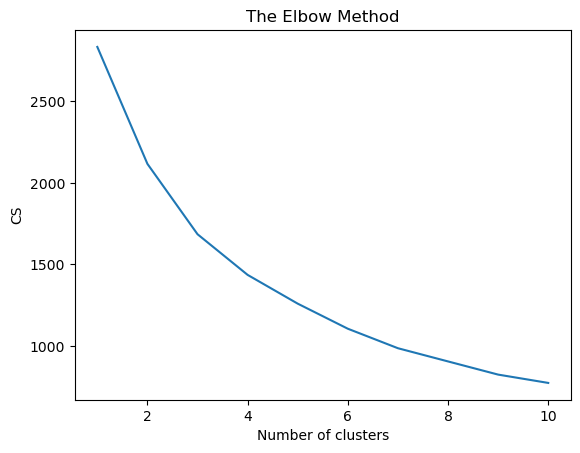

In [59]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [60]:
from sklearn.cluster import KMeans

# Based on the Elbow Method, choose the optimal number of clusters (let's say k=3)
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df1)


/Users/da_m1_46/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
cluster_labels = kmeans.predict(df1)

In [62]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [63]:
from sklearn.metrics import silhouette_score

silhouette_score = silhouette_score(df1, cluster_labels)
print('Silhouette score:', silhouette_score)

Silhouette score: 0.2528269087172616


In [64]:
# Add the cluster labels to the original dataset
df1['cluster'] = clusters

In [65]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [66]:
# Add the cluster labels to the original dataset
df1['cluster'] = clusters

In [67]:
df1

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Month,Day,Year,cluster
0,0.0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.272727,0.700000,1.000000,0
1,0.5,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,1.000000,0
2,0.0,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.272727,0.666667,1.000000,0
3,0.5,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.666667,1.000000,0
4,0.5,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.272727,0.566667,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.5,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,0.727273,0.766667,0.666667,1
7046,0.5,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,0.727273,0.733333,0.666667,1
7047,0.5,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,0.727273,0.666667,0.666667,1
7048,0.5,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,0.727273,0.633333,0.666667,1


In [68]:
df2['cluster'] = cluster_labels

In [69]:
cluster_0=df2[df2['cluster']==0]
cluster_0

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6998,1050855161656896_1192127984196279,photo,2/7/2017 11:00,9,0,2,7,0,1,1,0,0,0
6999,1050855161656896_1184329494976128,photo,1/31/2017 11:26,203,0,4,200,1,1,1,0,0,0
7000,1050855161656896_1172253536183724,photo,1/21/2017 23:18,266,7,3,265,1,0,0,0,0,0
7001,1050855161656896_1161057800636631,photo,1/9/2017 10:11,973,45,63,953,13,6,1,0,0,0


In [70]:
cluster_1=df2[df2['cluster']==1]
cluster_1

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
86,246675545449582_1530240427093081,photo,12/26/2017 6:23,293,6,1,275,15,3,0,0,0,1
87,246675545449582_1527322154051575,photo,12/24/2017 10:28,236,12,0,226,8,1,1,0,0,1
88,246675545449582_1521905564593234,photo,12/21/2017 8:14,312,10,0,291,18,3,0,0,0,1
89,246675545449582_1502675606516230,photo,12/10/2017 23:28,24,12,0,24,0,0,0,0,0,1
90,246675545449582_1497272363723221,link,12/8/2017 2:37,16,9,0,15,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,1
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,1
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,1
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,1


<Axes: xlabel='num_comments', ylabel='num_likes'>

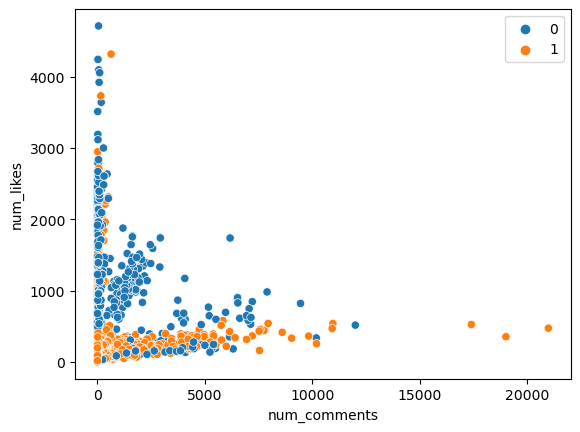

In [71]:
import seaborn as sns

sns.scatterplot(data = df2, x = 'num_comments', y = 'num_likes', hue = kmeans.labels_)

Cluster 0:Most they post photos and they get high likes and less comments.

Cluster 1:Most people they post videos and statuses they get more comments and more likes.  And those people who get less like also get less comments.

<Axes: xlabel='num_likes', ylabel='num_shares'>

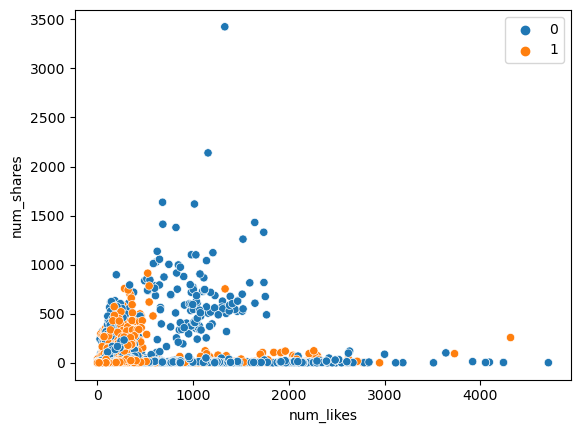

In [72]:
sns.scatterplot(data = df2, x ='num_likes', y ='num_shares', hue = kmeans.labels_)

Cluster 0:Most they post photos and they get high likes and less shares.

Cluster 1:Most people they post videos and statuses they get more shares and more likes.  And those people who get less like also get less shares.

## Reccomendations

1. If you have business and want to  share your work with people it's safer to share it in a form of videos.
2. If you have personal account and you are interested in  getting more likes you should use photos.